In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xlrd

In [ ]:
%pip install keras-tuner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Skripsi Abdul Hakim/piton skripsi

Mounted at /content/drive
/content/drive/MyDrive/Skripsi Abdul Hakim/piton skripsi


In [ ]:
# file_name = "Data_Sipalaga_BRG_140103_01_tanpa_praproses.xlsx"

In [ ]:
# data = pd.read_excel('data/' + file_name, engine='openpyxl')
# data['TANGGAL'] = pd.to_datetime(data['TANGGAL'], unit='d', origin='1899-12-30')
# data

,TANGGAL,JAM,KODE,LOKASI,PRO,KAB,KEC,LON,LAT,HUJAN,SOIL,GWL
0,2019-07-30,18,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,57.440,-0.232
1,2019-07-30,19,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.8,57.876,-0.233
2,2019-07-31,1,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,57.535,-0.221
3,2019-07-31,2,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,56.881,-0.230
4,2019-07-31,3,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,56.277,-0.231
...,...,...,...,...,...,...,...,...,...,...,...,...
15973,2021-10-09,21,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.0,46.070,-0.287
15974,2021-10-09,22,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,6.6,45.610,-0.316
15975,2021-10-09,23,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,3.2,46.009,-0.310
15976,2021-10-10,0,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,2.8,46.285,-0.304


In [ ]:
# for i in data.index:
#     data['TANGGAL'][i] = data['TANGGAL'][i] + pd.Timedelta(hours=data['JAM'][i])
# data

<ipython-input-9-848f658b2544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TANGGAL'][i] = data['TANGGAL'][i] + pd.Timedelta(hours=data['JAM'][i])


,TANGGAL,JAM,KODE,LOKASI,PRO,KAB,KEC,LON,LAT,HUJAN,SOIL,GWL
0,2019-07-30 18:00:00,18,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,57.440,-0.232
1,2019-07-30 19:00:00,19,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.8,57.876,-0.233
2,2019-07-31 01:00:00,1,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,57.535,-0.221
3,2019-07-31 02:00:00,2,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,56.881,-0.230
4,2019-07-31 03:00:00,3,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,56.277,-0.231
...,...,...,...,...,...,...,...,...,...,...,...,...
15973,2021-10-09 21:00:00,21,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.0,46.070,-0.287
15974,2021-10-09 22:00:00,22,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,6.6,45.610,-0.316
15975,2021-10-09 23:00:00,23,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,3.2,46.009,-0.310
15976,2021-10-10 00:00:00,0,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,2.8,46.285,-0.304


In [ ]:
# data.to_pickle("rimba_panjang.pkl")

In [ ]:
file_name = "rimba_panjang.pkl"

In [ ]:
data = pd.read_pickle(file_name)
data

,TANGGAL,JAM,KODE,LOKASI,PRO,KAB,KEC,LON,LAT,HUJAN,SOIL,GWL
0,2019-07-30 18:00:00,18,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,57.440,-0.232
1,2019-07-30 19:00:00,19,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.8,57.876,-0.233
2,2019-07-31 01:00:00,1,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,57.535,-0.221
3,2019-07-31 02:00:00,2,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,56.881,-0.230
4,2019-07-31 03:00:00,3,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,56.277,-0.231
...,...,...,...,...,...,...,...,...,...,...,...,...
15973,2021-10-09 21:00:00,21,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.0,46.070,-0.287
15974,2021-10-09 22:00:00,22,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,6.6,45.610,-0.316
15975,2021-10-09 23:00:00,23,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,3.2,46.009,-0.310
15976,2021-10-10 00:00:00,0,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,2.8,46.285,-0.304


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15978 entries, 0 to 15977
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  15978 non-null  datetime64[ns]
 1   JAM      15978 non-null  int64         
 2   KODE     15978 non-null  object        
 3   LOKASI   15978 non-null  object        
 4   PRO      15978 non-null  object        
 5   KAB      15978 non-null  object        
 6   KEC      15978 non-null  object        
 7   LON      15978 non-null  float64       
 8   LAT      15978 non-null  float64       
 9   HUJAN    15978 non-null  float64       
 10  SOIL     15978 non-null  float64       
 11  GWL      15978 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
data.columns

Index(['TANGGAL', 'JAM', 'KODE', 'LOKASI', 'PRO', 'KAB', 'KEC', 'LON', 'LAT',
       'HUJAN', 'SOIL', 'GWL'],
      dtype='object')

In [ ]:
data = data.drop(['JAM', 'KODE', 'LOKASI', 'PRO', 'KAB', 'KEC', 'LON', 'LAT'], axis=1)
data

,TANGGAL,HUJAN,SOIL,GWL
0,2019-07-30 18:00:00,0.0,57.440,-0.232
1,2019-07-30 19:00:00,1.8,57.876,-0.233
2,2019-07-31 01:00:00,0.2,57.535,-0.221
3,2019-07-31 02:00:00,0.2,56.881,-0.230
4,2019-07-31 03:00:00,0.0,56.277,-0.231
...,...,...,...,...
15973,2021-10-09 21:00:00,1.0,46.070,-0.287
15974,2021-10-09 22:00:00,6.6,45.610,-0.316
15975,2021-10-09 23:00:00,3.2,46.009,-0.310
15976,2021-10-10 00:00:00,2.8,46.285,-0.304


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

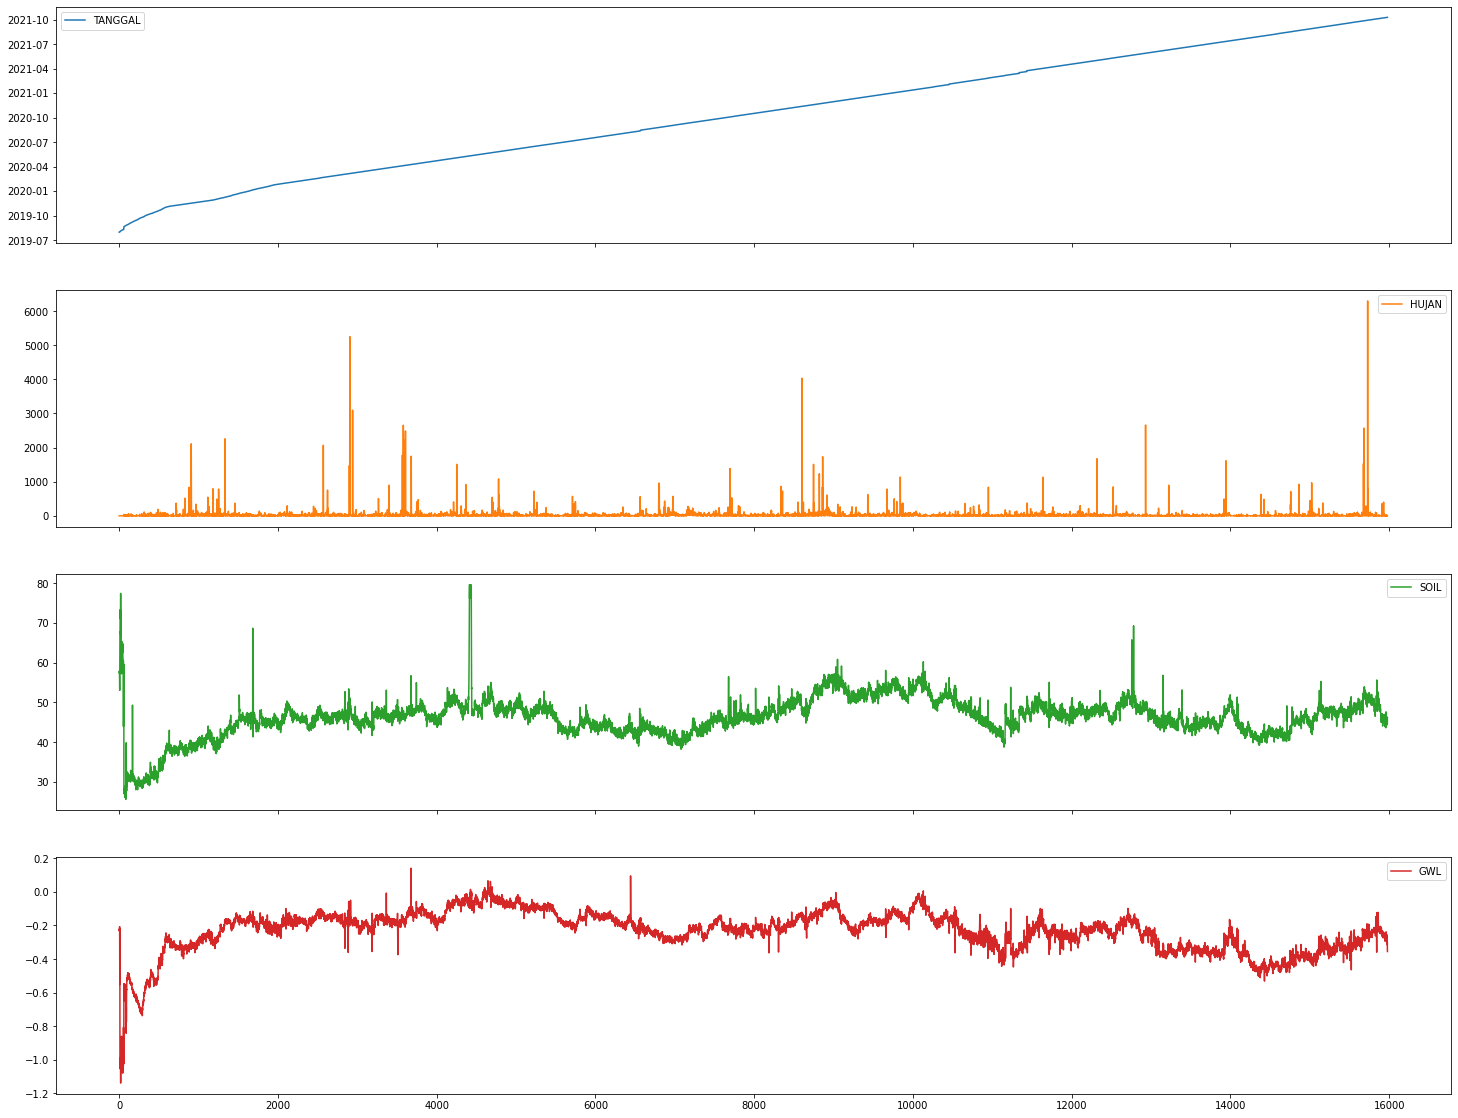

In [ ]:
data.plot(subplots=True, figsize=(25,20))

In [ ]:
data

,TANGGAL,HUJAN,SOIL,GWL
0,2019-07-30 18:00:00,0.0,57.440,-0.232
1,2019-07-30 19:00:00,1.8,57.876,-0.233
2,2019-07-31 01:00:00,0.2,57.535,-0.221
3,2019-07-31 02:00:00,0.2,56.881,-0.230
4,2019-07-31 03:00:00,0.0,56.277,-0.231
...,...,...,...,...
15973,2021-10-09 21:00:00,1.0,46.070,-0.287
15974,2021-10-09 22:00:00,6.6,45.610,-0.316
15975,2021-10-09 23:00:00,3.2,46.009,-0.310
15976,2021-10-10 00:00:00,2.8,46.285,-0.304


In [ ]:
data = data.set_index('TANGGAL')

In [ ]:
data = data.asfreq('1H')
data

,HUJAN,SOIL,GWL
TANGGAL,,,
2019-07-30 18:00:00,0.0,57.440,-0.232
2019-07-30 19:00:00,1.8,57.876,-0.233
2019-07-30 20:00:00,NaN,NaN,NaN
2019-07-30 21:00:00,NaN,NaN,NaN
2019-07-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-10-09 21:00:00,1.0,46.070,-0.287
2021-10-09 22:00:00,6.6,45.610,-0.316
2021-10-09 23:00:00,3.2,46.009,-0.310


array([<AxesSubplot:xlabel='TANGGAL'>, <AxesSubplot:xlabel='TANGGAL'>,
       <AxesSubplot:xlabel='TANGGAL'>], dtype=object)

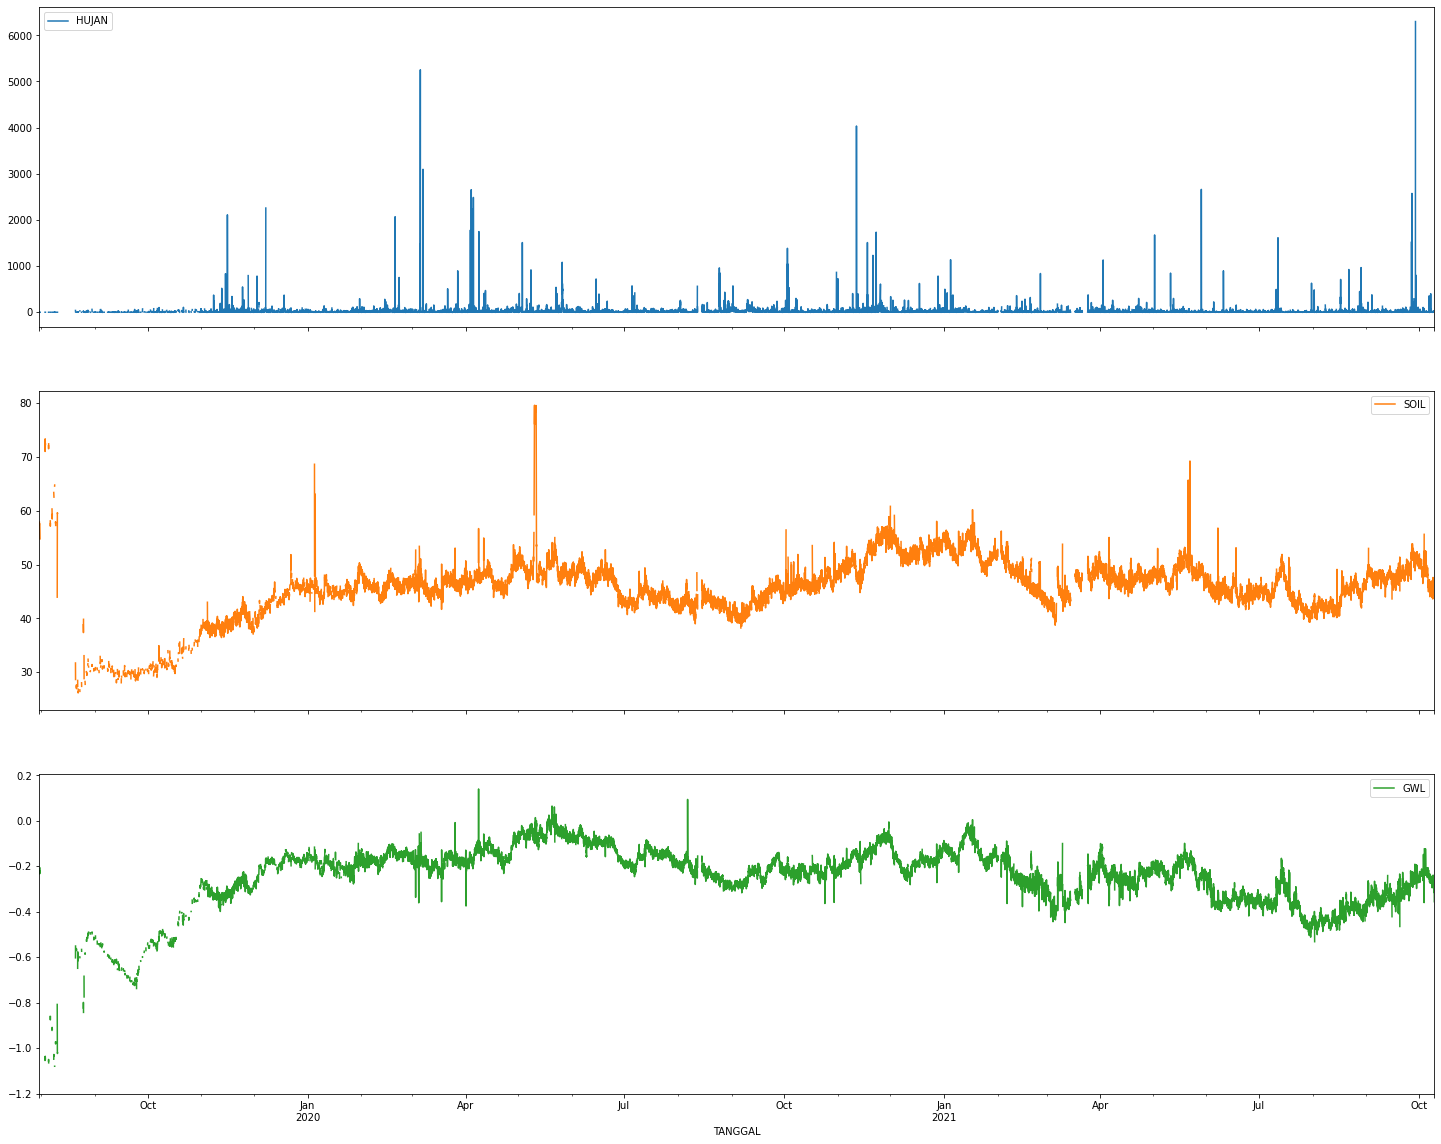

In [ ]:
data.plot(subplots=True, figsize=(25,20))

In [ ]:
data.to_pickle('rimba_panjang_missing.pkl')

In [ ]:
data.info()

# Start

In [ ]:
dataset = pd.read_pickle("impute_linear.pkl")
dataset = dataset[['GWL', 'SOIL', 'HUJAN']]
dataset

,GWL,SOIL,HUJAN
2019-07-30 18:00:00,-0.232,57.440000,0.000000
2019-07-30 19:00:00,-0.233,57.876000,1.800000
2019-07-30 20:00:00,-0.231,57.819167,1.533333
2019-07-30 21:00:00,-0.229,57.762333,1.266667
2019-07-30 22:00:00,-0.227,57.705500,1.000000
...,...,...,...
2021-10-09 21:00:00,-0.287,46.070000,1.000000
2021-10-09 22:00:00,-0.316,45.610000,6.600000
2021-10-09 23:00:00,-0.310,46.009000,3.200000
2021-10-10 00:00:00,-0.304,46.285000,2.800000


In [ ]:
dataset = dataset.reset_index()
dataset

,index,GWL,SOIL,HUJAN
0,2019-07-30 18:00:00,-0.232,57.440000,0.000000
1,2019-07-30 19:00:00,-0.233,57.876000,1.800000
2,2019-07-30 20:00:00,-0.231,57.819167,1.533333
3,2019-07-30 21:00:00,-0.229,57.762333,1.266667
4,2019-07-30 22:00:00,-0.227,57.705500,1.000000
...,...,...,...,...
19251,2021-10-09 21:00:00,-0.287,46.070000,1.000000
19252,2021-10-09 22:00:00,-0.316,45.610000,6.600000
19253,2021-10-09 23:00:00,-0.310,46.009000,3.200000
19254,2021-10-10 00:00:00,-0.304,46.285000,2.800000


In [ ]:
dataset['index'] = pd.to_datetime(dataset['index'])
dataset = dataset.set_index('index')

array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>], dtype=object)

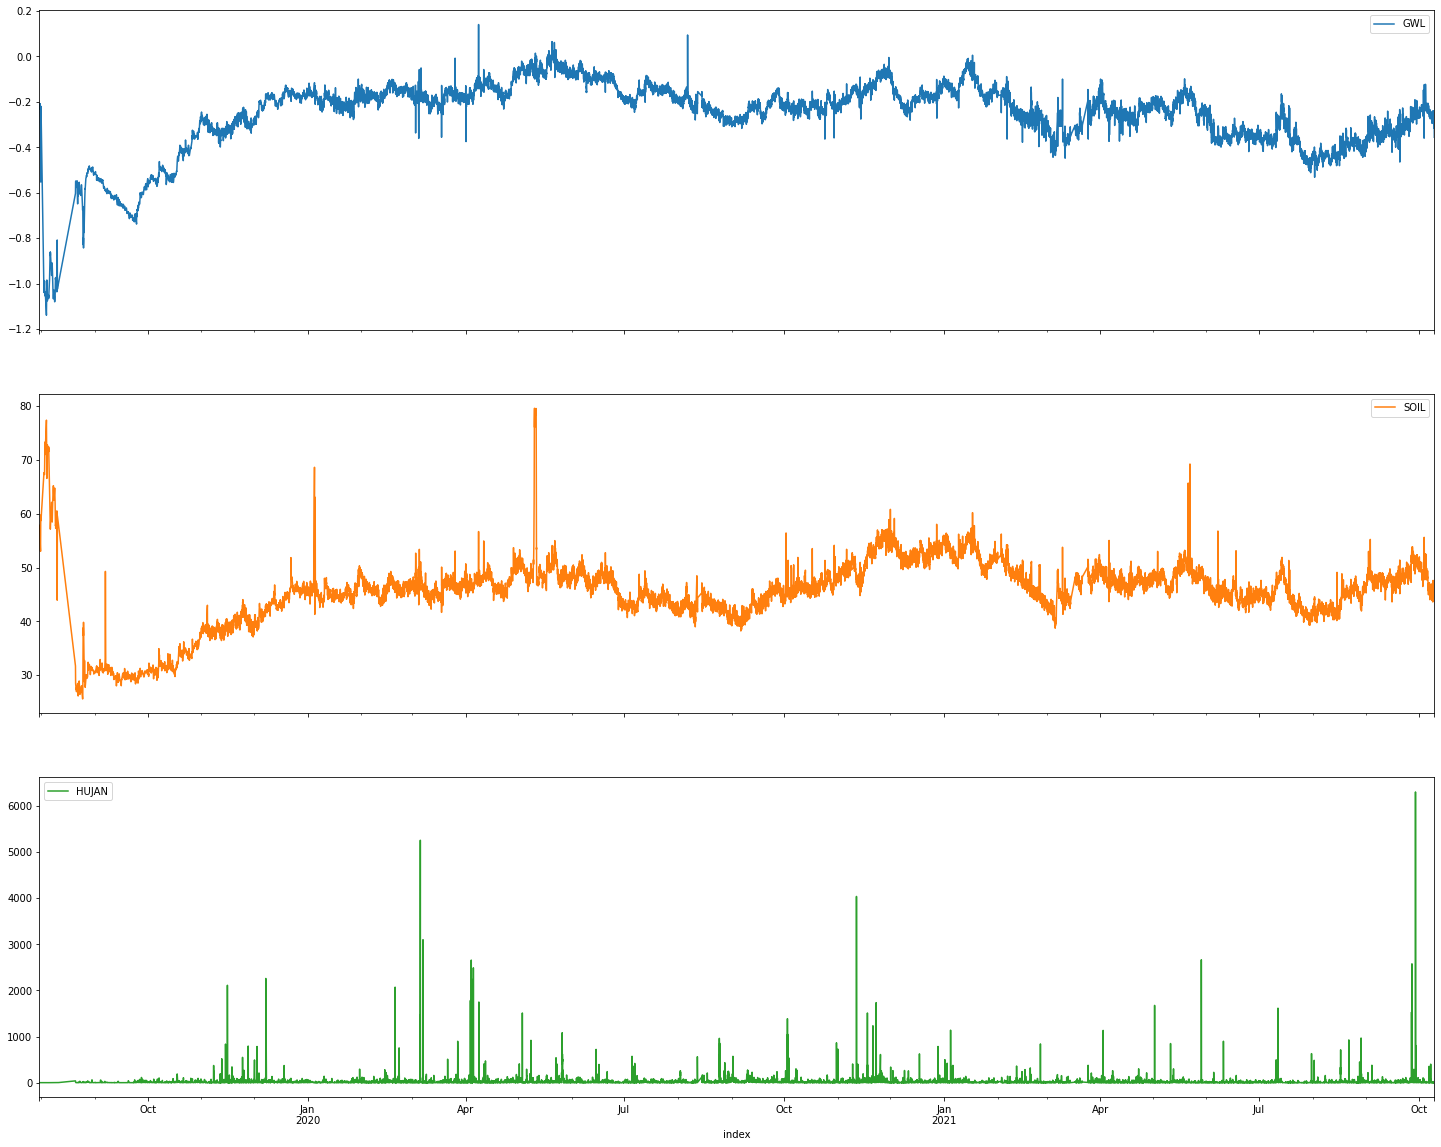

In [ ]:
dataset.plot(subplots=True, figsize=(25,20))

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [ ]:
from keras_tuner import RandomSearch
from pickle import dump,load
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
values = dataset.values

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
scaled

array([[7.09147772e-01, 5.89862775e-01, 0.00000000e+00],
       [7.08365911e-01, 5.97936999e-01, 2.85768718e-04],
       [7.09929633e-01, 5.96884510e-01, 2.43432612e-04],
       ...,
       [6.48162627e-01, 3.78173670e-01, 5.08033276e-04],
       [6.52853792e-01, 3.83284876e-01, 4.44529117e-04],
       [6.12197029e-01, 3.57080687e-01, 0.00000000e+00]])

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,0.709148,0.589863,0.000000,0.708366,0.597937,0.000286
2,0.708366,0.597937,0.000286,0.709930,0.596885,0.000243
3,0.709930,0.596885,0.000243,0.711493,0.595832,0.000201
4,0.711493,0.595832,0.000201,0.713057,0.594780,0.000159
5,0.713057,0.594780,0.000159,0.714621,0.593727,0.000116
...,...,...,...,...,...,...
19251,0.647381,0.377914,0.000699,0.666145,0.379303,0.000159
19252,0.666145,0.379303,0.000159,0.643471,0.370785,0.001048
19253,0.643471,0.370785,0.001048,0.648163,0.378174,0.000508
19254,0.648163,0.378174,0.000508,0.652854,0.383285,0.000445


In [ ]:
reframed = reframed.iloc[:, :-2]
reframed

,var1(t-1),var2(t-1),var3(t-1),var1(t)
1,0.709148,0.589863,0.000000,0.708366
2,0.708366,0.597937,0.000286,0.709930
3,0.709930,0.596885,0.000243,0.711493
4,0.711493,0.595832,0.000201,0.713057
5,0.713057,0.594780,0.000159,0.714621
...,...,...,...,...
19251,0.647381,0.377914,0.000699,0.666145
19252,0.666145,0.379303,0.000159,0.643471
19253,0.643471,0.370785,0.001048,0.648163
19254,0.648163,0.378174,0.000508,0.652854


In [ ]:
n_row = 19255
n_feature = 4

In [ ]:
n_train = int(n_row * 0.8)

values = reframed.values

In [ ]:
train = values[:n_train, :]
test  = values[n_train:, :]

In [ ]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(15404, 1, 3) (15404,) (3851, 1, 3) (3851,)


In [ ]:
epoch = [25, 50]
unit_1 = [10]
dropout_1 = [0.2]
unit_2 = [10]
dropout_2 = [0.2]
dense = [100]

In [ ]:
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(LSTM(10, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',
                                      metrics=['mse', 'mae', 'mape'])

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(train_X.shape[1],train_X.shape[2])))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model

In [ ]:
tuner = RandomSearch(
        build_model,
        objective='mse',
        max_trials=2,
        executions_per_trial=1
        )

In [ ]:
tuner.search(
        x=train_X,
        y=train_y,
        epochs=20,
        batch_size=128,
        validation_data=(test_X,test_y),
)

Trial 2 Complete [00h 04m 38s]
mse: 0.0008351324941031635

Best mse So Far: 0.0005878505180589855
Total elapsed time: 00h 08m 06s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
lstm_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
lstm_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step':

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 416
n_layers: 3
lstm_0_units: 96
layer_2_neurons: 416
Dropout_rate: 0.30000000000000004
dense_activation: relu
lstm_1_units: 32
lstm_2_units: 32
Score: 0.0005878505180589855
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 4
lstm_0_units: 512
layer_2_neurons: 160
Dropout_rate: 0.2
dense_activation: relu
lstm_1_units: 192
lstm_2_units: 64
lstm_3_units: 32
Score: 0.0008351324941031635


In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
214/214 - 10s - loss: 0.1349 - mse: 0.1349 - mae: 0.2985 - mape: 345.6271 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0443 - val_mape: 7.1899 - 10s/epoch - 48ms/step
Epoch 2/50
214/214 - 2s - loss: 0.0233 - mse: 0.0233 - mae: 0.1180 - mape: 35561.7109 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0467 - val_mape: 7.6477 - 2s/epoch - 9ms/step
Epoch 3/50
214/214 - 2s - loss: 0.0213 - mse: 0.0213 - mae: 0.1133 - mape: 36375.1602 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0457 - val_mape: 7.4234 - 2s/epoch - 9ms/step
Epoch 4/50
214/214 - 3s - loss: 0.0198 - mse: 0.0198 - mae: 0.1086 - mape: 36662.0703 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0467 - val_mape: 7.6160 - 3s/epoch - 14ms/step
Epoch 5/50
214/214 - 3s - loss: 0.0187 - mse: 0.0187 - mae: 0.1054 - mape: 36585.1914 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0470 - val_mape: 7.6789 - 3s/epoch - 16ms/step
Epoch 6/50
214/214 - 3s - loss: 0.0180 - mse: 0.0180 - mae: 0.1035 - mape: 41300.0352 -

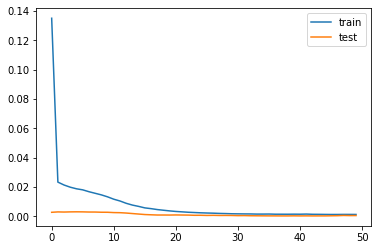

In [ ]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from math import sqrt
from numpy import concatenate

In [ ]:
min_gwl_df = dataset['GWL'].min()
max_gwl_df = dataset['GWL'].max()

121/121 [==============================] - 2s 18ms/step
Test RMSE: 0.01956
Test R-Squared: 0.94088
Test MAE: 0.01446


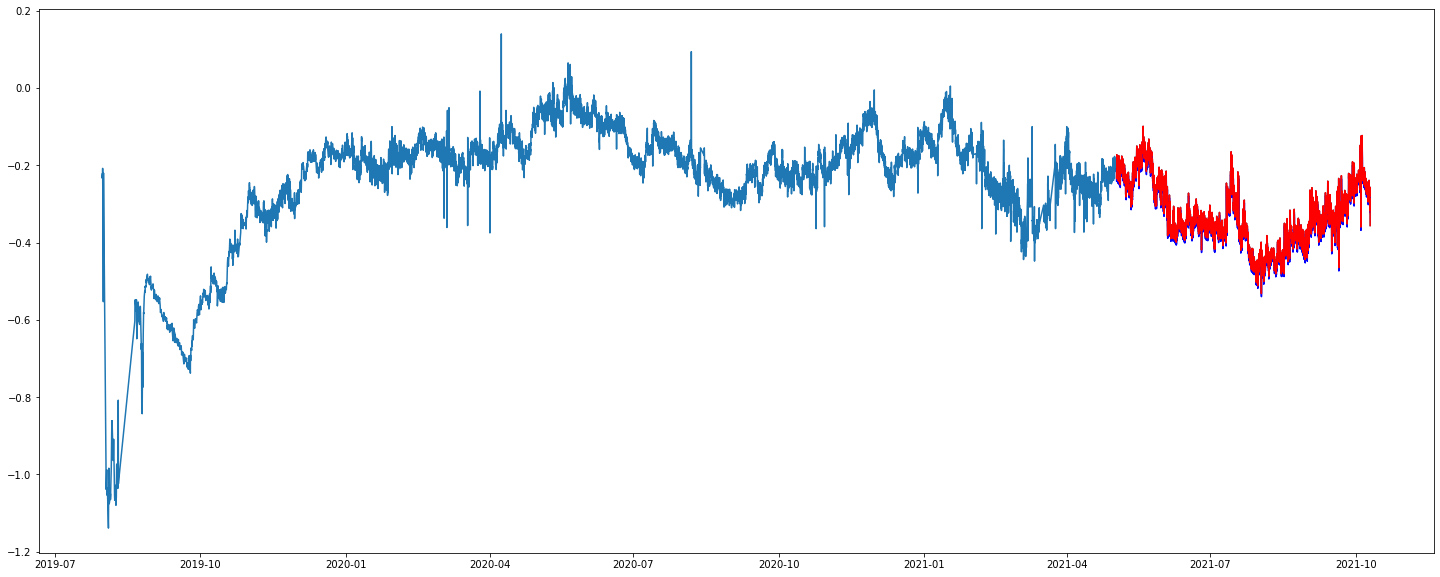

In [ ]:
ypred = best_model.predict(test_X)
inv_ypred = ypred.flatten()*(max_gwl_df - min_gwl_df) + min_gwl_df

inv_yact = test_y*(max_gwl_df - min_gwl_df) + min_gwl_df

rmse = sqrt(mean_squared_error(inv_yact, inv_ypred))
rsquare = r2_score(inv_yact, inv_ypred)
mae = mean_absolute_error(inv_yact, inv_ypred)

print('Test RMSE: %.5f' % rmse)
print('Test R-Squared: %.5f' % rsquare)
print('Test MAE: %.5f' % mae)

df_result = pd.DataFrame({
    'date': dataset.index[n_train+1:],
    'actual': inv_yact,
    'predicted': inv_ypred
})

plt.figure(figsize=(25,10))

plt.plot(dataset.index, dataset['GWL'])
plt.plot(df_result['date'], df_result['predicted'], 'b-', label = 'PRED')
plt.plot(df_result['date'], df_result['actual'], 'r-', label = 'ACT')

In [ ]:
ypred = model.predict(test_X)
inv_ypred = ypred.flatten()*(max_gwl_df - min_gwl_df) + min_gwl_df

121/121 [==============================] - 1s 2ms/step


In [ ]:
inv_yact = test_y*(max_gwl_df - min_gwl_df) + min_gwl_df

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = sqrt(mean_squared_error(inv_yact, inv_ypred))
rsquare = r2_score(inv_yact, inv_ypred)
mae = mean_absolute_error(inv_yact, inv_ypred)
print('Test RMSE: %.5f' % rmse)
print('Test R-Squared: %.5f' % rsquare)
print('Test MAE: %.5f' % mae)

Test RMSE: 0.02892
Test R-Squared: 0.87078
Test MAE: 0.02373


In [ ]:
df_result = pd.DataFrame({
    'date': dataset.index[n_train+1:],
    'actual': inv_yact,
    'predicted': inv_ypred
})

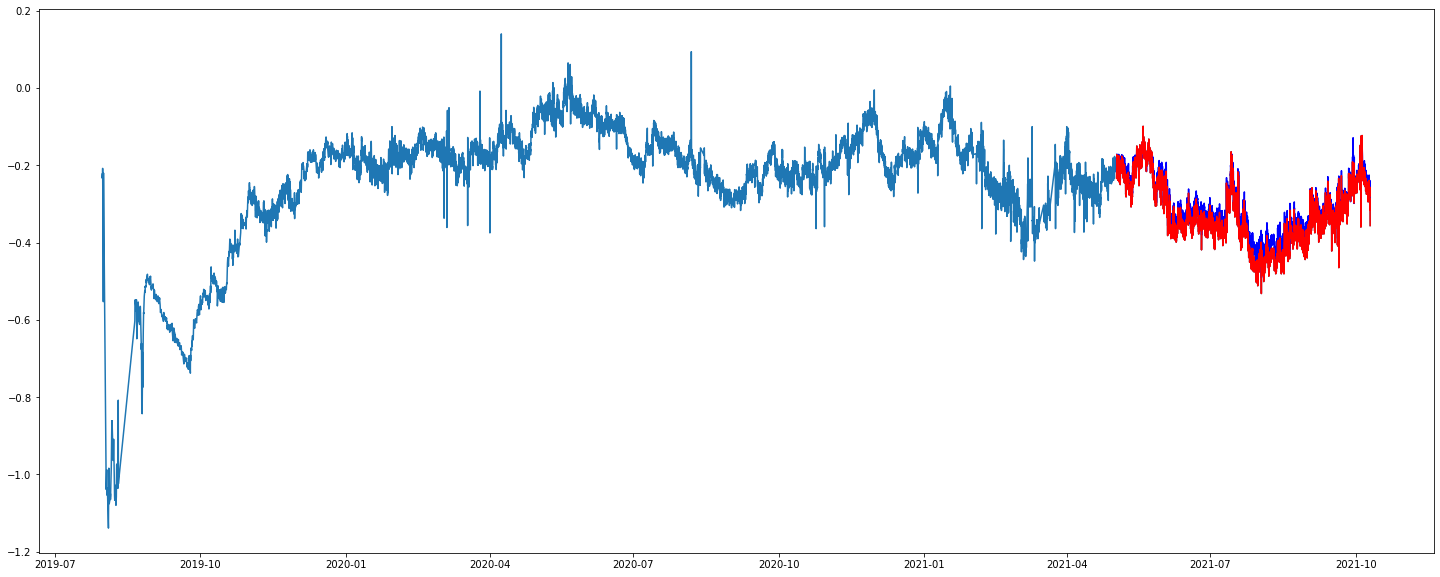

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(dataset.index, dataset['GWL'])
plt.plot(df_result['date'], df_result['predicted'], 'b-', label = 'PRED')
plt.plot(df_result['date'], df_result['actual'], 'r-', label = 'ACT')

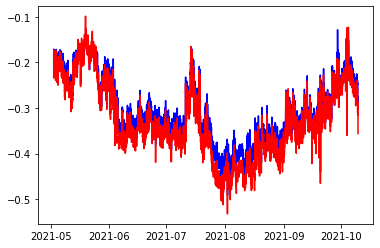

In [ ]:
plt.plot(df_result['date'], df_result['predicted'], 'b-', label = 'PRED')
plt.plot(df_result['date'], df_result['actual'], 'r-', label = 'ACT')